In [1]:
from os import listdir, mkdir, system
from os.path import join, isfile, isdir
from skimage import io
from skimage import color
from scipy import ndimage

import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

sup_folder = '/mnt/c/Users/bhaladik/mrcnn_development/training_data/synmikro_macrophages'
print(isdir(sup_folder))
subfolders = [join(sup_folder, f) for f in listdir(sup_folder) if isdir(join(sup_folder, f)) if not ('cluster' in f)]

test_folder = subfolders[0]

In /home/bhaladik/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/bhaladik/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/bhaladik/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/bhaladik/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/bhaladik/.local/lib/python3.6/site-packages/matplotlib/

True


In [2]:
def mask_to_label_annotation(in_mask):
    labeled, num_lbl = ndimage.label(in_mask.astype(np.bool))
    return labeled


def get_matched_image_mask_paths(im_folder, mask_folder):
    im_filepaths = [join(im_folder, f) for f in listdir(im_folder) if isfile(join(im_folder, f))]
    mask_filepaths = [join(mask_folder, f) for f in listdir(mask_folder) if isfile(join(mask_folder, f))]
    all_images = [f for f in im_filepaths if 'DAPI' in f]
    all_masks = [f for f in mask_filepaths if 'DAPI' in f]
    all_images.sort()
    all_masks.sort()
    return all_images, all_masks

def matched_paths_from_supfolder(in_folder):
    im_folder = join(in_folder, 'images')
    mask_folder = join(in_folder, 'masks')
    im_paths, mask_paths = get_matched_image_mask_paths(im_folder, mask_folder)
    return im_paths, mask_paths

def check_random_image_mask_pair(in_folder):
    im_paths, mask_paths = matched_paths_from_supfolder(in_folder)
    index = np.random.choice(len(im_paths))
    im_path = im_paths[index]
    mask_path = mask_paths[index]
    mask_im =io.imread(mask_path)
    mask_im = mask_to_label_annotation(mask_im)
    print(np.unique(mask_im))
    im = io.imread(im_path)
    print(im.shape)
    fig, ax = plt.subplots(ncols=2, figsize=(17,12))
    ax[0].imshow(im)
    ax[1].imshow(mask_im)
    fig.show()

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
(1024, 1280)


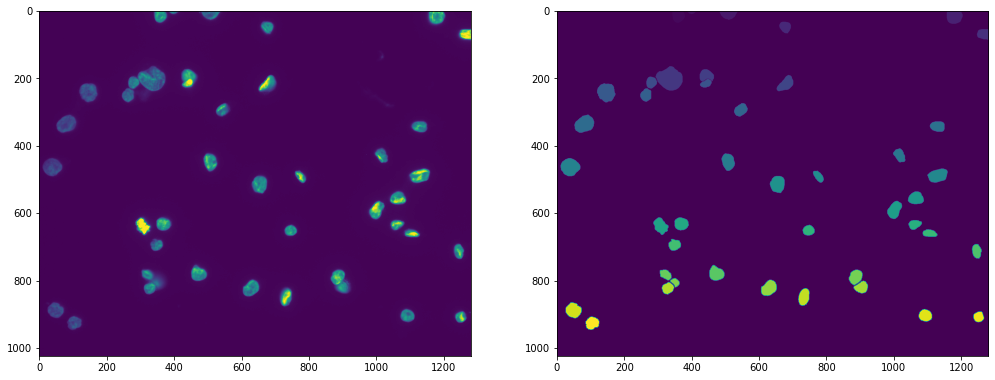

In [3]:
check_random_image_mask_pair(test_folder)

In [4]:
def convert_dataset_to_kromp_format(target_folder, out_folder, sub_im_folder='rawimages', sub_mask_folder='groundtruth', id_template='nuclei_{}.tif'):
    subfolders = [join(target_folder, f) for f in listdir(target_folder) if isdir(join(target_folder, f)) if (not ('cluster' in f))]
    im_id = 0
    if not isdir(out_folder):
        mkdir(out_folder)
    im_target_folder = join(out_folder, sub_im_folder)
    mask_target_folder = join(out_folder, sub_mask_folder)
    if isdir(im_target_folder):
        system('rm -r {}'.format(im_target_folder))
    if isdir(mask_target_folder):
        system('rm -r {}'.format(mask_target_folder))
    mkdir(im_target_folder)
    mkdir(mask_target_folder)
    for subfolder in subfolders:
        im_paths, mask_paths = matched_paths_from_supfolder(subfolder)
        for index in range(len(im_paths)):
            imname = id_template.format(im_id)
            im_path = im_paths[index]
            mask_path = mask_paths[index]
            mask_im =io.imread(mask_path)
            mask_im = mask_to_label_annotation(mask_im)
            im = io.imread(im_path)
            io.imsave(join(im_target_folder, imname), im)
            io.imsave(join(mask_target_folder, imname), mask_im)
            im_id += 1
        print('Done with folder ' + subfolder)
    print('Done with processing {} images'.format(im_id))

In [5]:
convert_dataset_to_kromp_format(sup_folder, '/mnt/c/Users/bhaladik/mrcnn_development/training_data/korfhage_data')

/home/bhaladik/.local/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: /mnt/c/Users/bhaladik/mrcnn_development/training_data/korfhage_data/groundtruth/nuclei_0.tif is a low contrast image
/home/bhaladik/.local/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: /mnt/c/Users/bhaladik/mrcnn_development/training_data/korfhage_data/groundtruth/nuclei_1.tif is a low contrast image
/home/bhaladik/.local/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: /mnt/c/Users/bhaladik/mrcnn_development/training_data/korfhage_data/groundtruth/nuclei_2.tif is a low contrast image
/home/bhaladik/.local/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: /mnt/c/Users/bhaladik/mrcnn_development/training_data/korfhage_data/groundtruth/nuclei_3.tif is a low contrast image
/home/bhaladik/.local/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: /mnt/c/Users/bhaladik/mrcnn_development/training_data/korfhage_data/groundtruth/nuclei_

Done with folder /mnt/c/Users/bhaladik/mrcnn_development/training_data/synmikro_macrophages/test


/home/bhaladik/.local/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: /mnt/c/Users/bhaladik/mrcnn_development/training_data/korfhage_data/groundtruth/nuclei_20.tif is a low contrast image
/home/bhaladik/.local/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: /mnt/c/Users/bhaladik/mrcnn_development/training_data/korfhage_data/groundtruth/nuclei_21.tif is a low contrast image
/home/bhaladik/.local/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: /mnt/c/Users/bhaladik/mrcnn_development/training_data/korfhage_data/groundtruth/nuclei_22.tif is a low contrast image
/home/bhaladik/.local/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: /mnt/c/Users/bhaladik/mrcnn_development/training_data/korfhage_data/groundtruth/nuclei_23.tif is a low contrast image
/home/bhaladik/.local/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: /mnt/c/Users/bhaladik/mrcnn_development/training_data/korfhage_data/groundtruth/nuc

Done with folder /mnt/c/Users/bhaladik/mrcnn_development/training_data/synmikro_macrophages/train
Done with processing 82 images


/home/bhaladik/.local/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: /mnt/c/Users/bhaladik/mrcnn_development/training_data/korfhage_data/groundtruth/nuclei_81.tif is a low contrast image
